In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
import kaggle

In [2]:
#kaggle.api.dataset_download_file('pranavuikey/black-friday-sales-eda', file_name='train.csv',  path='data/')

In [3]:
df = pd.read_csv("data/train.csv.zip", compression='zip')
pd.concat([df.head(), df.sample(5), df.tail()])

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
101778,1003727,P00343542,M,36-45,7,B,1,0,8,11.0,NaN,5886
357411,1001088,P00249842,F,0-17,10,A,3,0,8,NaN,NaN,4085
244409,1001652,P00265242,M,26-35,16,C,1,0,5,8.0,NaN,5336
549012,1004540,P00371644,F,26-35,14,C,1,1,20,NaN,NaN,494
513973,1001184,P00074242,F,26-35,4,C,1,1,5,NaN,NaN,1825


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
# information provided by info() and head() some of the columns data type are wrong.
# According to this, only Purchase feature is numeric represents plausible measures other features are categorocial or category-like.
df.Purchase.describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

In [6]:
# inspecting properties of categorical features with category-like ones
df.astype({i:'str' for i in df.columns[:-1] if df[i].dtype != 'object'}).describe(include = 'O').T

,count,unique,top,freq
User_ID,550068,5891,1001680,1026
Product_ID,550068,3631,P00265242,1880
Gender,550068,2,M,414259
Age,550068,7,26-35,219587
Occupation,550068,21,4,72308
City_Category,550068,3,B,231173
Stay_In_Current_City_Years,550068,5,1,193821
Marital_Status,550068,2,0,324731
Product_Category_1,550068,20,5,150933
Product_Category_2,550068,18,nan,173638


In [7]:
# Results: 
# The most frequent user is "1001680" in terms of unit and product is "P00265242".
# Dataset is really mail dominated
# 26-35 age group are accounts for almost half of the observations
# There are many missing values in Product Category 2 and 3. Some of these may unavailable rather than missing.

In [8]:
df.isnull().sum()/len(df)*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

In [9]:
# Result:
# Only product category features have missing values. This will be handled later

In [10]:
# checking unique values for categorical and category-like features incase any extraordinary values.
for i in df.columns[2:-1]:
    print(i)
    print("********")
    print(df[i].value_counts(dropna = False))
    print("\n---------")

Gender
********
M    414259
F    135809
Name: Gender, dtype: int64

---------
Age
********
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

---------
Occupation
********
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

---------
City_Category
********
B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

---------
Stay_In_Current_City_Years
********
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

---------
Marital_Status
********
0    324731
1    225337
Name: Marital_Status, dtype: int64

---------
Product_Category_1
********
5     150933
1     140378
8     113925
11     24287
2      2386

In [11]:
# Combining of Product Categories by dealing with missing values
df["Product_Category"] = df["Product_Category_1"].astype(str)+"-"+df["Product_Category_2"].fillna("a").astype(str).str.replace(".0","")+"-"+df["Product_Category_3"].fillna("a").astype(str).str.replace(".0","")
df["Product_Category"] = df["Product_Category"].str.replace("-a", "")
df[["Product_Category_1", "Product_Category_2", "Product_Category_3", "Product_Category"]]

C:\Users\ertad\AppData\Local\Temp\ipykernel_10808\3181204625.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Product_Category"] = df["Product_Category_1"].astype(str)+"-"+df["Product_Category_2"].fillna("a").astype(str).str.replace(".0","")+"-"+df["Product_Category_3"].fillna("a").astype(str).str.replace(".0","")


,Product_Category_1,Product_Category_2,Product_Category_3,Product_Category
0,3,NaN,NaN,3
1,1,6.0,14.0,1-6-14
2,12,NaN,NaN,12
3,12,14.0,NaN,12-14
4,8,NaN,NaN,8
...,...,...,...,...
550063,20,NaN,NaN,20
550064,20,NaN,NaN,20
550065,20,NaN,NaN,20
550066,20,NaN,NaN,20


In [12]:
# Let's check the coherence of giving Product Category code of Products
Products_Category=df.groupby("Product_ID")["Product_Category"].value_counts().reset_index(name = 'counts')
Products_Category

,Product_ID,Product_Category,counts
0,P00000142,3-4-5,1152
1,P00000242,2-4-9,376
2,P00000342,5-14,244
3,P00000442,5-8,92
4,P00000542,5,149
...,...,...,...
3626,P0099442,6-8,200
3627,P0099642,8,13
3628,P0099742,3-4-5,126
3629,P0099842,5-12-14,102


In [13]:
# There is no more than one category codes for the same product
Products_Category["Product_ID"].duplicated().sum()

0

In [14]:
# Check if we can use Product_Category_1 for the missing values of Product_Category_2
df.groupby(["Product_ID", "Product_Category_1"])["Product_Category_2"].value_counts(dropna= False).reset_index(name = 'counts')["Product_ID"].duplicated().sum()

0

In [15]:
# There is no way to use Product_Category_1 because there is no coincidence value in Product_Category_1 feature for the missing values of Product_Category_2

In [16]:
# Let's check another possible features for the imputation of Product_Category_2 in a more detailed way
df.groupby(['Age', 'Gender', 'Marital_Status'])['Product_Category_2'].agg([pd.Series.mode, 'count'])

mode  count
Age   Gender Marital_Status             
0-17  F      0                4.0   3634
      M      0                2.0   7014
18-25 F      0               14.0  12682
             1               14.0   4182
      M      0                2.0  42041
             1                8.0  10252
26-35 F      0               14.0  19992
             1               14.0  13833
      M      0                8.0  71322
             1                8.0  45013
36-45 F      0               14.0  11455
             1               14.0   7140
      M      0                8.0  34275
             1                8.0  22480
46-50 F      0               14.0   2099
             1               14.0   6741
      M      0                8.0   6372
             1                8.0  15798
51-55 F      0               14.0   2297
             1               14.0   4160
      M      0                8.0   4942
             1                8.0  14625
55+   F      0               14.0   1345
             1               14.0   1970
      M      0                8.0   4013
             1                8.0   6753

In [17]:
# count values seem plausible

In [18]:
feature_list = ['Age', 'Gender', 'Marital_Status']
success = pd.DataFrame()
for i in range(1,4):
    df['category2_fill_value'] = df.groupby(feature_list[:i])['Product_Category_2'].transform(lambda x: x.value_counts().idxmax())
    success_ratio = (df['Product_Category_2'] == df['category2_fill_value']).sum()/df['Product_Category_2'].notna().sum()*100
    success.loc[str(feature_list[:i]),'imputation success ratio (%)'] = '{0:.2f}'.format(success_ratio)
success

,imputation success ratio (%)
['Age'],17.06
"['Age', 'Gender']",17.93
"['Age', 'Gender', 'Marital_Status']",17.96


In [19]:
#df['Product_Category_2'].fillna(df['category2_fill_value'])
#success ratio of imputation of Product_Category_2 using other feature are very low. 
# This also imply that Product_Category_2 feature is very deviant
#So, EDA process based on this cimcumtances lead to insignificant results
# As a result, it is better to drop following features.
df.drop(['Product_Category_2', 'Product_Category_3', 'category2_fill_value', 'Product_Category'], axis = 1, inplace = True)

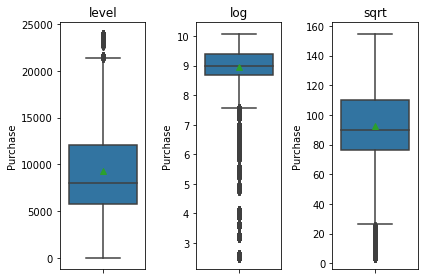

In [20]:
fig, ax = plt.subplots(1,3)
func_list = {'level': eval('lambda x: x'), 'log':np.log, 'sqrt':np.sqrt}
for i,item in enumerate(func_list.items()):
    sns.boxplot(y = df['Purchase'].transform(item[1]), showmeans= True, ax = ax[i]).set_title(item[0])
    plt.tight_layout();

In [21]:
func_list = {'level': eval('lambda x: x'), 'log':np.log, 'sqrt':np.sqrt}
result = pd.DataFrame()
for item in func_list.items():
    data = df.Purchase.transform(item[1])
    lower_band = np.quantile(data, .25)-1.5*stats.iqr(data)
    upper_band = np.quantile(data, .75)+1.5*stats.iqr(data)
    result.loc[item[0], 'outlier_ratio(%)'] = data[~data.between(lower_band, upper_band)].count()/len(df)*100
result

,outlier_ratio(%)
level,0.486667
log,4.813768
sqrt,1.125134


In [22]:
lower_band = np.quantile(df.Purchase, .25)-1.5*stats.iqr(df.Purchase)
upper_band = np.quantile(df.Purchase, .75)+1.5*stats.iqr(df.Purchase)
outlier_indices = df[~df.Purchase.between(lower_band, upper_band)].index
df.drop(axis = 0, index = outlier_indices, inplace = True)

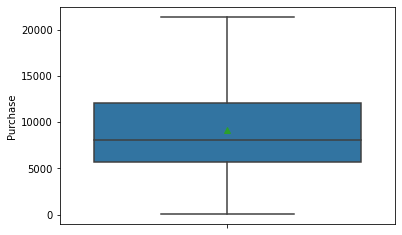

In [23]:
sns.boxplot(y = df['Purchase'], showmeans= True);

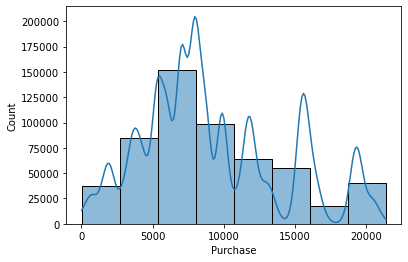

In [71]:
sns.histplot(df['Purchase'], kde = True, bins = 8);

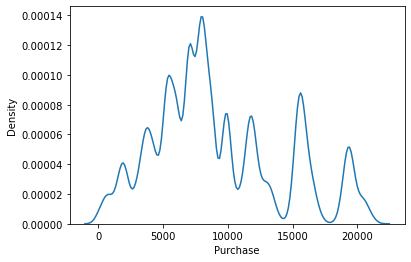

In [77]:
sns.kdeplot(df['Purchase']);

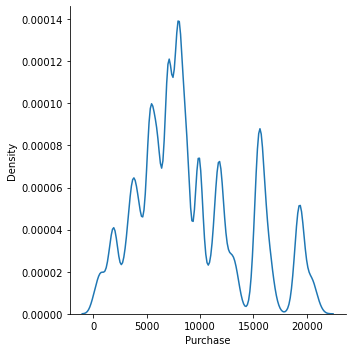

In [78]:
sns.displot(x="Purchase", kind="kde", data=df);

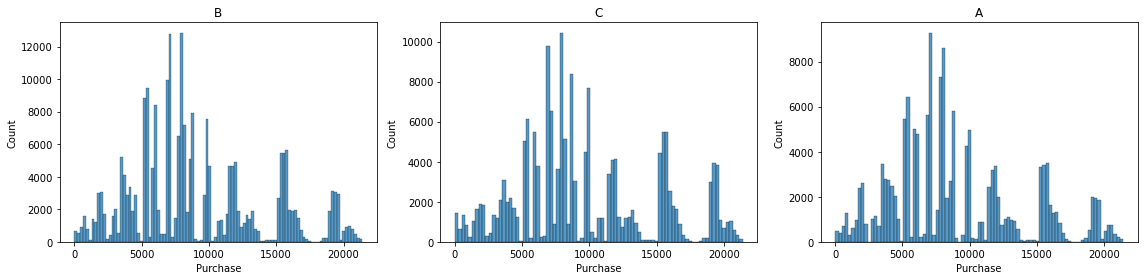

In [68]:
categories = df.City_Category.value_counts().index
fig, ax = plt.subplots(1,3, figsize = (16,4))
for index, i in enumerate(categories):
    sns.histplot(x = df[df['City_Category'] == i]['Purchase'], ax = ax[index]).set_title(i)
plt.tight_layout();

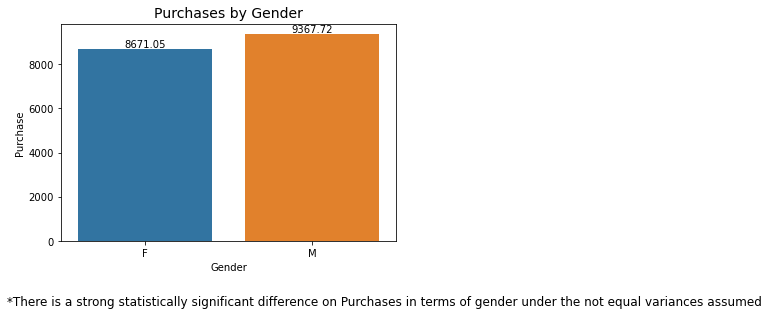

In [27]:
alpha = 0.01

levene_test = stats.levene(df[df['Gender'] == 'F']['Purchase'], df[df['Gender'] == 'M']['Purchase'])
if levene_test.pvalue < alpha:
    var_assumption = False
    var_assumption_text = "not equal variances"
else:
    var_assumption = True
    var_assumption_text = "equal variances"
    
t_test = stats.ttest_ind(df[df['Gender'] == 'F']['Purchase'], df[df['Gender'] == 'M']['Purchase'], equal_var = var_assumption)
if t_test.pvalue < alpha:
    footnote = f"*There is a strong statistically significant difference on Purchases in terms of gender under the {var_assumption_text} assumed"
else:
    footnote = f"*There is a no strong statistically significant difference on Purchases in terms of gender under the {var_assumption_text} assumed"

p = sns.barplot(data = df, x = 'Gender', y = 'Purchase', ci = None)
p.bar_label(p.containers[0])
p.set_title("Purchases by Gender", fontsize=14)
plt.figtext(0,-0.1, footnote, fontsize=12);

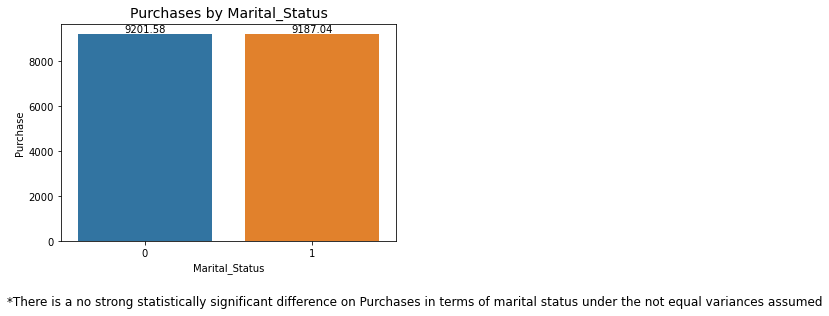

In [29]:
alpha = 0.01

levene_test = stats.levene(df[df['Marital_Status'] == 0]['Purchase'], df[df['Marital_Status'] == 1]['Purchase'])
if levene_test.pvalue < alpha:
    var_assumption = False
    var_assumption_text = "not equal variances"
else:
    var_assumption = True
    var_assumption_text = "equal variances"
    
t_test = stats.ttest_ind(df[df['Marital_Status'] == 0]['Purchase'], df[df['Marital_Status'] == 1]['Purchase'], equal_var = var_assumption)
if t_test.pvalue < alpha:
    footnote = f"*There is a strong statistically significant difference on Purchases in terms of marital status under the {var_assumption_text} assumed"
else:
    footnote = f"*There is a no strong statistically significant difference on Purchases in terms of marital status under the {var_assumption_text} assumed"

p = sns.barplot(data = df, x = 'Marital_Status', y = 'Purchase', ci = None)
p.bar_label(p.containers[0])
p.set_title("Purchases by Marital_Status", fontsize=14)
plt.figtext(0,-0.1, footnote, fontsize=12);

In [137]:
# feature = 'City_Category'
# categories = df[feature].unique()
# groups = []
# ks = pd.DataFrame()

# for i in categories:
#     groups.append(df[df[feature] == i]['Purchase'])
# groups = dict(zip(categories, groups))

feature = 'City_Category'
groups = {category: numeric.tolist() for category, numeric in df.groupby("City_Category")["Purchase"]}
ks = pd.DataFrame()
alpha = 0.01

for group in groups.items():
    ks.loc[group[0], 'Kolmogorov-Smirnov'] = stats.kstest(group[1], 'norm').pvalue
levene = stats.levene(*groups.values()).pvalue

if any([ks.iloc[i,0]<alpha for i in range(len(ks))]) or levene < alpha:
    test = stats.kruskal(*groups.values())
else:
    test = stats.f_oneway(*groups.values())
test.pvalue

KruskalResult(statistic=2291.957275497881, pvalue=0.0)

In [80]:
df.Purchase.std()/df.Purchase.mean()

0.5370892978048525

In [126]:
{k: g["Purchase"].tolist() for k,g in df.groupby("City_Category")}

{'A': [8370,
  15200,
  1422,
  1057,
  15227,
  7871,
  5254,
  3957,
  6073,
  15665,
  5378,
  2079,
  13055,
  8851,
  19653,
  5958,
  11415,
  5380,
  3594,
  4209,
  5407,
  7803,
  11458,
  7746,
  19525,
  11959,
  19172,
  8773,
  11023,
  4654,
  4664,
  8290,
  7011,
  4211,
  1539,
  12099,
  8797,
  10681,
  7801,
  15517,
  12098,
  6976,
  5384,
  6973,
  5168,
  3449,
  7177,
  4570,
  9564,
  2230,
  6940,
  15774,
  7854,
  17391,
  6074,
  6119,
  15333,
  6129,
  5265,
  7888,
  4035,
  5280,
  7909,
  811,
  2846,
  7994,
  3897,
  6996,
  8593,
  6917,
  5329,
  5942,
  15895,
  7165,
  9846,
  8701,
  8757,
  20961,
  6950,
  1414,
  4325,
  4028,
  3432,
  3715,
  3540,
  5352,
  1828,
  7159,
  5878,
  5845,
  5234,
  11694,
  15654,
  9844,
  16698,
  15957,
  8599,
  8138,
  12422,
  7766,
  15208,
  5284,
  7965,
  11279,
  19462,
  9938,
  7036,
  11429,
  11715,
  7973,
  7076,
  2304,
  11846,
  7908,
  5223,
  6996,
  15900,
  11822,
  7802,
  15624,
  

In [123]:
dict(zip(df.City_Category, df.Purchase))

{'A': 473, 'C': 365, 'B': 490}

In [124]:
df.set_index('City_Category')['Purchase'].to_dict()

{'A': 473, 'C': 365, 'B': 490}

In [125]:
dict(zip(df['City_Category'], df['Purchase']))

{'A': 473, 'C': 365, 'B': 490}

In [132]:
df.groupby("City_Category")['Purchase'].sum()

City_Category
A    1300587440
B    2090931484
C    1642084642
Name: Purchase, dtype: int64

In [136]:
{category: numeric.tolist() for category, numeric in df.groupby("City_Category")["Purchase"]}

{'A': [8370,
  15200,
  1422,
  1057,
  15227,
  7871,
  5254,
  3957,
  6073,
  15665,
  5378,
  2079,
  13055,
  8851,
  19653,
  5958,
  11415,
  5380,
  3594,
  4209,
  5407,
  7803,
  11458,
  7746,
  19525,
  11959,
  19172,
  8773,
  11023,
  4654,
  4664,
  8290,
  7011,
  4211,
  1539,
  12099,
  8797,
  10681,
  7801,
  15517,
  12098,
  6976,
  5384,
  6973,
  5168,
  3449,
  7177,
  4570,
  9564,
  2230,
  6940,
  15774,
  7854,
  17391,
  6074,
  6119,
  15333,
  6129,
  5265,
  7888,
  4035,
  5280,
  7909,
  811,
  2846,
  7994,
  3897,
  6996,
  8593,
  6917,
  5329,
  5942,
  15895,
  7165,
  9846,
  8701,
  8757,
  20961,
  6950,
  1414,
  4325,
  4028,
  3432,
  3715,
  3540,
  5352,
  1828,
  7159,
  5878,
  5845,
  5234,
  11694,
  15654,
  9844,
  16698,
  15957,
  8599,
  8138,
  12422,
  7766,
  15208,
  5284,
  7965,
  11279,
  19462,
  9938,
  7036,
  11429,
  11715,
  7973,
  7076,
  2304,
  11846,
  7908,
  5223,
  6996,
  15900,
  11822,
  7802,
  15624,
  